# Figure 5

Histograms of the retrieved parameters from the retrievals R1 and R2 during clear-sky observations.

In [1]:
from string import ascii_lowercase as abc

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from lizard.writers.figure_to_file import write_figure

from si_clouds.io.readers.ancillary import read_ancillary_data
from si_clouds.io.readers.oem_result import read_oem_result_concat

In [2]:
ds_anc = read_ancillary_data()

In [3]:
ds_a_un, ds_op_un, _, _ = read_oem_result_concat(
    version="pub_r1_clearsky_v1", test_id="", write=False
)

ds_a_fu, ds_op_fu, _, _ = read_oem_result_concat(
    version="pub_r2_clearsky_v1", test_id="", write=False
)

# remove times where the retrieval was not valid
ds_a_un = ds_a_un.sel(time=ds_anc.ix_retrieval_valid.sel(time=ds_a_un.time))
ds_op_un = ds_op_un.sel(time=ds_anc.ix_retrieval_valid.sel(time=ds_op_un.time))
ds_a_fu = ds_a_fu.sel(time=ds_anc.ix_retrieval_valid.sel(time=ds_a_fu.time))
ds_op_fu = ds_op_fu.sel(time=ds_anc.ix_retrieval_valid.sel(time=ds_op_fu.time))

In [4]:
# align the uncalibrated data and full retrieval data
ds_a_un_aligned, ds_a_fu_aligned, ds_op_un_aligned, ds_op_fu_aligned = (
    xr.align(ds_a_un, ds_a_fu, ds_op_un, ds_op_fu)
)

In [5]:
print(ds_a_un.conv.mean("time").item())
print(ds_a_fu.conv.mean("time").item())

0.9049532556995243
0.8656716417910447


In [6]:
print(len(ds_a_fu.time))
print(len(ds_a_un.time))

12194
12194


In [7]:
print(len(ds_a_un_aligned.time) / len(ds_a_un.time))

0.8113006396588486


In [8]:
colors = {
    "UNC": "C0",
    "FUL": "C1",
}

Created figure file: /home/nrisse/phd/projects/sea_ice_clouds/plots/paper/fig05.png


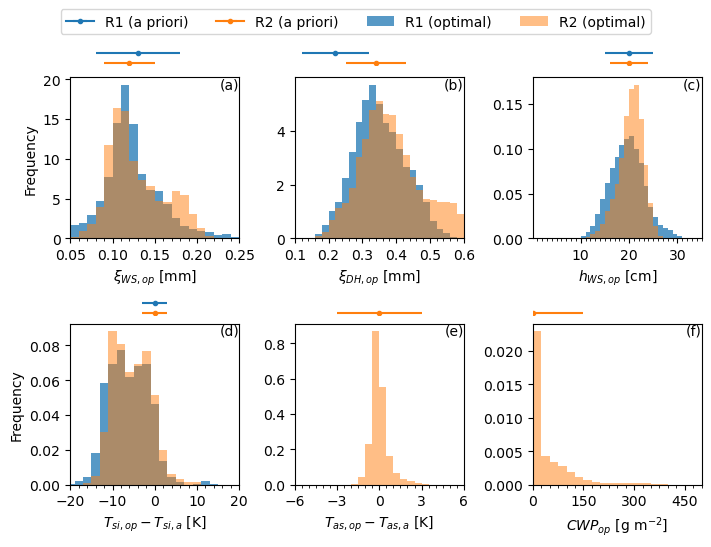

In [9]:
bin_steps = {
    "wind_slab_corr_length": np.arange(0, 0.3, 0.01),
    "depth_hoar_corr_length": np.arange(0.1, 0.7, 0.02),
    "wind_slab_thickness": np.arange(0, 40, 1),
    "t_si": np.arange(-25, 26, 2),
    "t_as": np.arange(-15, 16, 0.5),
    "cwp": np.arange(0, 500, 25),
}

factors = {
    "wind_slab_corr_length": 1,
    "depth_hoar_corr_length": 1,
    "wind_slab_thickness": 1e2,
    "t_si": 1,
    "t_as": 1,
    "cwp": 1e3,
}

fig, axes = plt.subplots(
    4,
    3,
    figsize=(7, 5),
    layout="constrained",
    height_ratios=[1, 8, 1, 8],
)

axes_err = axes[0::2, :]
axes = axes[1::2, :]

axes[0, 0].xaxis.set_major_locator(mticker.MultipleLocator(0.05))
axes[0, 0].xaxis.set_minor_locator(mticker.MultipleLocator(0.01))

axes[0, 1].xaxis.set_major_locator(mticker.MultipleLocator(0.1))
axes[0, 1].xaxis.set_minor_locator(mticker.MultipleLocator(0.02))

axes[0, 2].xaxis.set_major_locator(mticker.MultipleLocator(10))
axes[0, 2].xaxis.set_minor_locator(mticker.MultipleLocator(1))

axes[1, 0].xaxis.set_major_locator(mticker.MultipleLocator(10))
axes[1, 0].xaxis.set_minor_locator(mticker.MultipleLocator(2))

axes[1, 1].xaxis.set_major_locator(mticker.MultipleLocator(3))
axes[1, 1].xaxis.set_minor_locator(mticker.MultipleLocator(0.5))

axes[1, 2].xaxis.set_major_locator(mticker.MultipleLocator(150))
axes[1, 2].xaxis.set_minor_locator(mticker.MultipleLocator(25))

# these limits correspond to the parameter boundaries
axes[0, 0].set_xlim(0.05, 0.25)
axes_err[0, 0].set_xlim(0.05, 0.25)

axes[0, 1].set_xlim(0.1, 0.6)
axes_err[0, 1].set_xlim(0.1, 0.6)

axes[0, 2].set_xlim(0.09, 35)
axes_err[0, 2].set_xlim(0.09, 35)

axes[1, 0].set_xlim(-20, 20)
axes_err[1, 0].set_xlim(-20, 20)

axes[1, 1].set_xlim(-6, 6)
axes_err[1, 1].set_xlim(-6, 6)

axes[1, 2].set_xlim(0, 500)
axes_err[1, 2].set_xlim(0, 500)

axes[0, 0].set_xlabel(r"$\xi_{WS,op}$ [mm]")
axes[0, 1].set_xlabel(r"$\xi_{DH,op}$ [mm]")
axes[0, 2].set_xlabel(r"$h_{WS,op}$ [cm]")
axes[1, 0].set_xlabel(r"$T_{si,op} - T_{si,a}$ [K]")
axes[1, 1].set_xlabel(r"$T_{as,op} - T_{as,a}$ [K]")
axes[1, 2].set_xlabel(r"$CWP_{op}$ [g m$^{-2}$]")

axes[0, 0].set_ylabel("Frequency")
axes[1, 0].set_ylabel("Frequency")

for i, v in enumerate(list(bin_steps)):
    ax = axes.flat[i]
    ax_err = axes_err.flat[i]

    ax.annotate(
        f"({abc[i]})",
        xy=(1, 1),
        xycoords="axes fraction",
        ha="right",
        va="top",
    )

    if v in ["t_si", "t_as"]:
        if v in ds_op_un_aligned.x_vars.values:
            x_un = ds_op_un_aligned[v] - ds_a_un_aligned[v] * factors[v]
        x_fu = (ds_op_fu_aligned[v] - ds_a_fu_aligned[v]) * factors[v]
    else:
        if v in ds_op_un_aligned.x_vars.values:
            x_un = ds_op_un_aligned[v] * factors[v]
        x_fu = ds_op_fu_aligned[v] * factors[v]

    if v in ds_op_un_aligned.x_vars.values:
        a_un_mean = ds_a_un_aligned[v].mean("time").values * factors[v]
        a_un_std = ds_a_un_aligned[f"{v}_std"].mean("time").values * factors[v]
    a_fu_mean = ds_a_fu_aligned[v].mean("time").values * factors[v]
    a_fu_std = ds_a_fu_aligned[f"{v}_std"].mean("time").values * factors[v]

    # the mean of t_si varies, and therefore the histogram shows the anomaly
    if v in ["t_si", "t_as"]:
        a_un_mean = 0
        a_ca_mean = 0
        a_fu_mean = 0

    if v in ds_op_un_aligned.x_vars.values:
        ax_err.errorbar(
            x=a_un_mean,
            y=-1,
            xerr=a_un_std,
            color=colors["UNC"],
            marker=".",
            label="R1 (a priori)",
        )

    ax_err.errorbar(
        x=a_fu_mean,
        y=-3,
        xerr=a_fu_std,
        color=colors["FUL"],
        marker=".",
        label="R2 (a priori)",
    )

    if v in ds_op_un_aligned.x_vars.values:
        ax.hist(
            x_un,
            bins=bin_steps[v],
            histtype="stepfilled",
            color=colors["UNC"],
            density=True,
            label="R1 (optimal)",
            linewidth=plt.rcParams["lines.linewidth"],
            alpha=0.75,
        )
    ax.hist(
        x_fu,
        bins=bin_steps[v],
        histtype="stepfilled",
        color=colors["FUL"],
        density=True,
        label="R2 (optimal)",
        linewidth=plt.rcParams["lines.linewidth"],
        alpha=0.5,
    )


for ax in axes_err.flat:
    ax.set_axis_off()
    ax.set_ylim(-3.5, 0.5)

handles1, labels1 = axes_err[0, 0].get_legend_handles_labels()
handles2, labels2 = axes[0, 0].get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(),
    by_label.keys(),
    ncol=5,
    frameon=True,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
)

write_figure(
    fig,
    f"paper/fig05.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()

In [10]:
# compare retrieved skin temperature with kt-19 from R2
print(
    np.sqrt(((ds_op_fu.t_as - ds_anc.kt19_bt / 0.995) ** 2).mean("time")).item()
)  # optimal
print(
    np.sqrt(
        ((ds_a_fu.t_as.sel(time=ds_op_fu.time) - ds_anc.kt19_bt / 0.995) ** 2).mean(
            "time"
        )
    ).item()
)  # a priori

# bias for the same data
print(np.mean(ds_op_fu.t_as - ds_anc.kt19_bt / 0.995).item())  # optimal
print(
    np.mean(ds_a_fu.t_as.sel(time=ds_op_fu.time) - ds_anc.kt19_bt / 0.995).item()
)  # a priori

2.7981766407905644
3.060880953037222
-0.02880985375666894
-0.16782240670664214


In [11]:
print("Mean", ds_op_fu_aligned.cwp.mean("time").values.item() * 1e3)
print("Std", ds_op_fu_aligned.cwp.std("time").values.item() * 1e3)
print("RMSE", np.sqrt(np.mean(ds_op_fu_aligned.cwp**2)).values.item() * 1e3)
print(
    "95 quantile",
    ds_op_fu_aligned.cwp.quantile(0.95, "time").values.item() * 1e3,
)
print("\nNot aligned:")
print("Mean", ds_op_fu.cwp.mean("time").values.item() * 1e3)
print("Std", ds_op_fu.cwp.std("time").values.item() * 1e3)
print("RMSE", np.sqrt(np.mean(ds_op_fu.cwp**2)).values * 1e3)
print("95 quantile", ds_op_fu.cwp.quantile(0.95, "time").values.item() * 1e3)

Mean 47.78104050271601
Std 74.42406292829304
RMSE 88.4418960350599
95 quantile 213.40376845350363

Not aligned:
Mean 60.57603551273662
Std 93.10349806276274
RMSE 111.07527821240379
95 quantile 305.5266767845174
